<h2><center>Cáncer de mama </center></h2>
<h4><center>Julio Cesar Cons Calderón </center></h4>

<div>
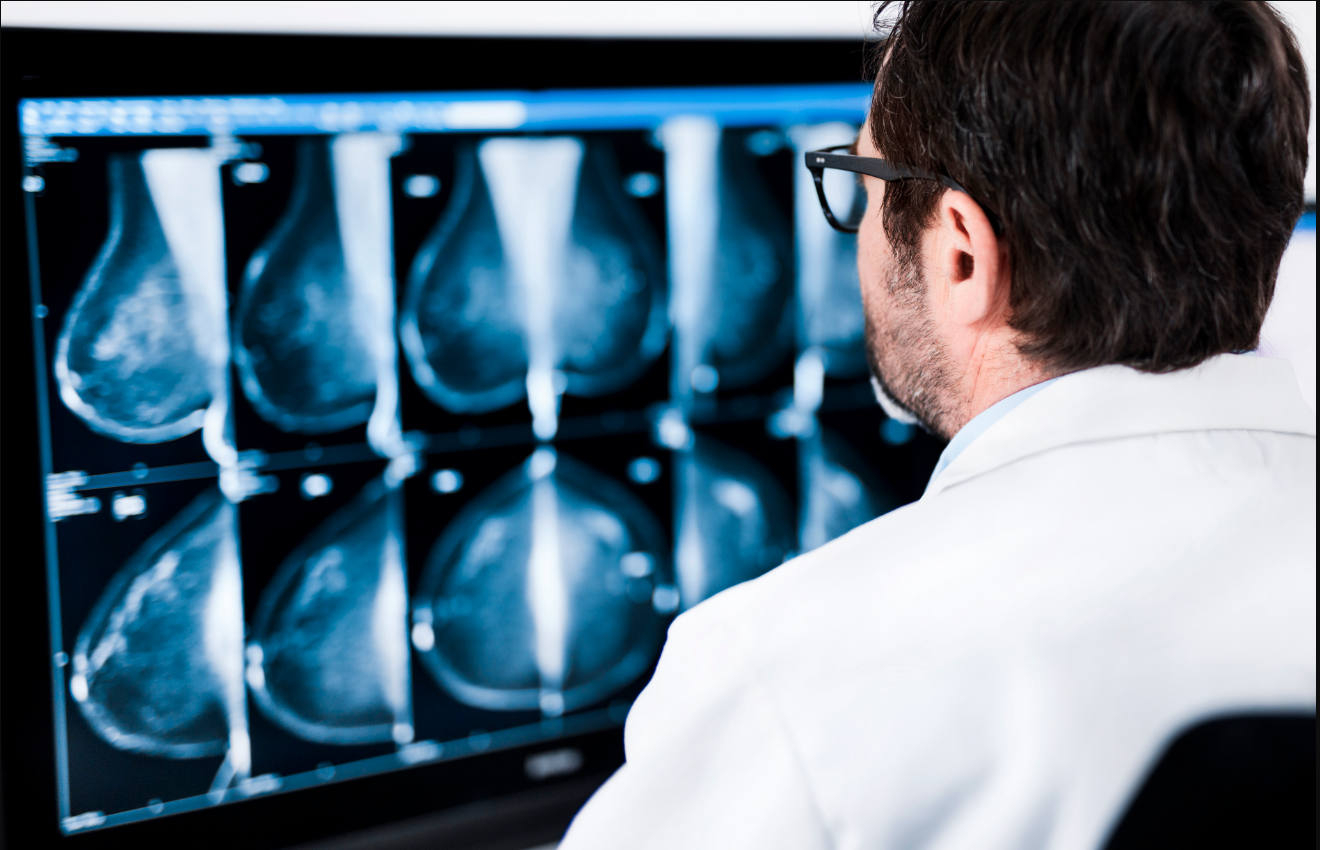
</div>



### Coleccion de datos clinicos de pacientes con estudios de mamografia y las siguientes propiedades

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant


### Datos extraidos de kaggle https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [1]:
import pandas as pd 
df = pd.read_csv("./archive/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### La columna id y unnamed 32 no proporciona informacion relevante

In [2]:
df = df.drop(['id',"Unnamed: 32"], axis=1)

### Grafico de correlaciones


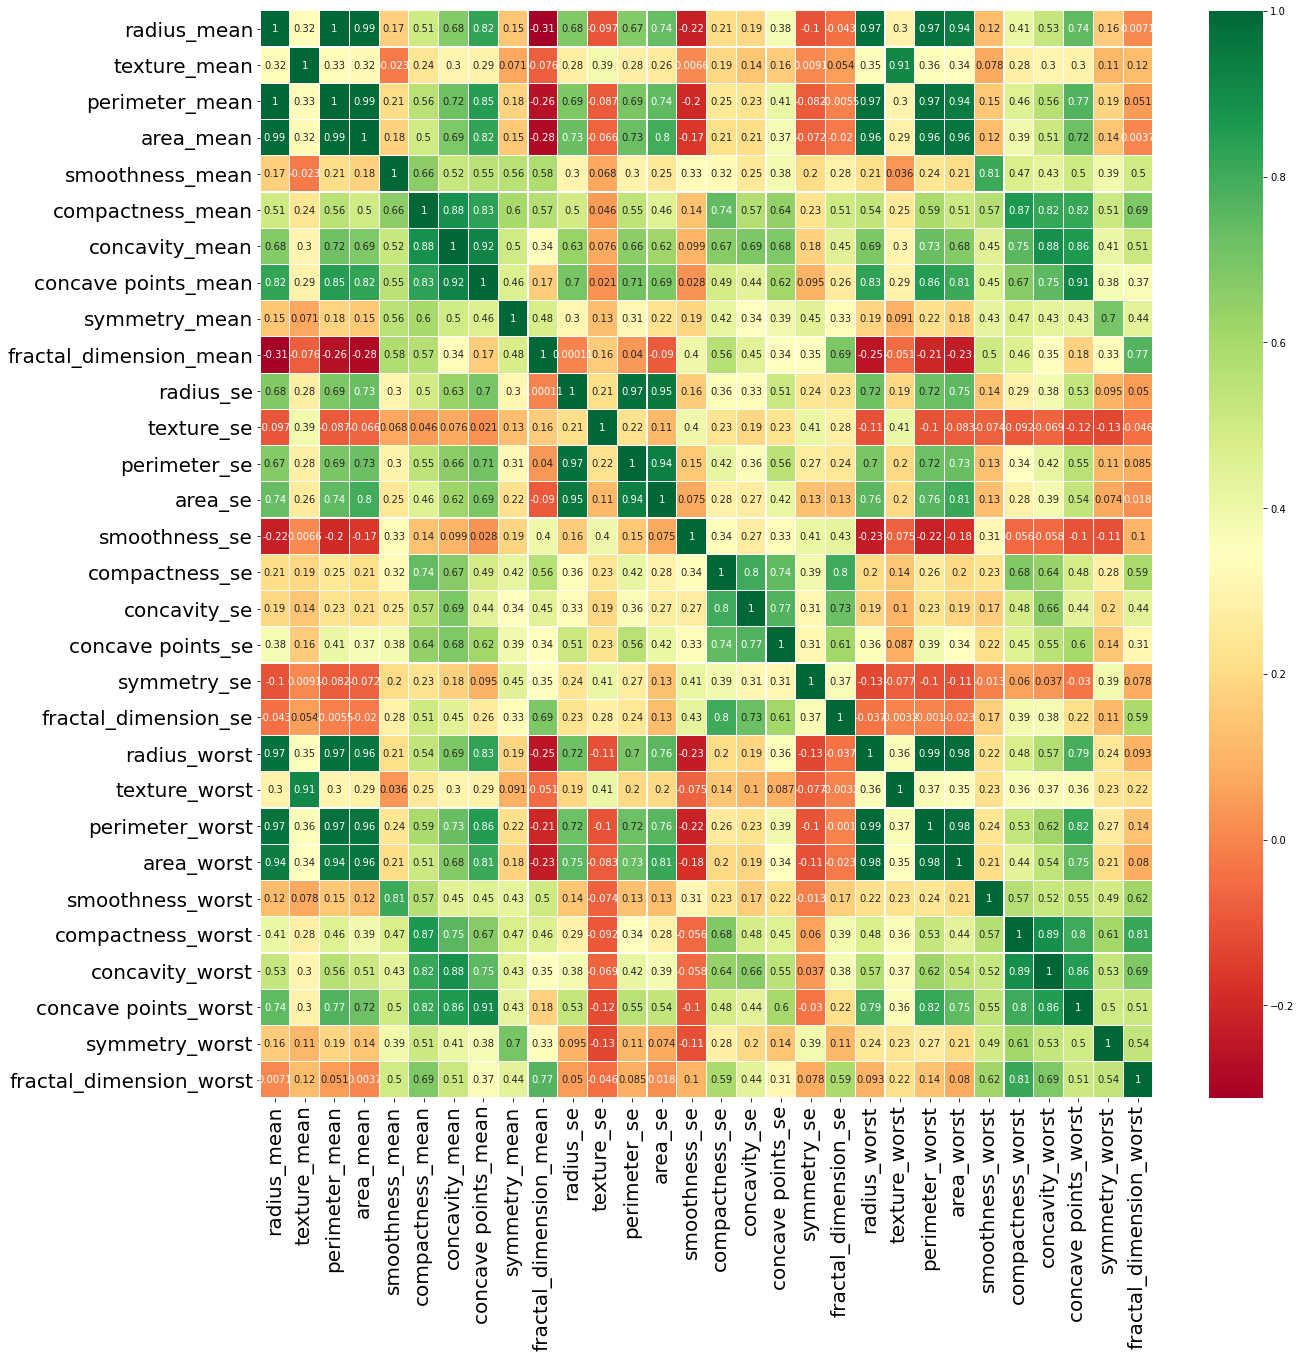

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### Las siguientes columnas se remueven ya sea por correlacion o porque no ofrecen informacion util a la red neuronal

In [4]:
cols = ['radius_worst',
       'texture_worst',
       'perimeter_worst',
       'area_worst',
       'smoothness_worst',
       'compactness_worst',
       'concavity_worst',
       'concave points_worst',
       'symmetry_worst',
       'fractal_dimension_worst',
       'perimeter_mean',
       'perimeter_se',
       'area_mean',
       'area_se',
       'concavity_mean',
       'concavity_se',
       'concave points_mean',
       'concave points_se']

df = df.drop(cols, axis=1)

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
0,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
1,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
2,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
3,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
4,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115


#### Se separan los datos en aquellos que son las variables de entrada (features) y la columna que proporciona la informacion de clasificacion de la enfermedad

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

X_df = df
X_df = X_df.drop(['diagnosis'], axis=1)
y_df = df['diagnosis']
y_df = [0 if x == 'B' else 1 for x in y_df]

### Se separan los datos en 70% entrenamiento (train) y 30% prueba (test)

In [8]:
x_tr, x_ts, y_tr, y_ts = train_test_split(X_df, y_df, test_size = 0.3, random_state = 42)

y_tr = np.asarray(y_tr, dtype = int)
y_ts = np.asarray(y_ts, dtype = int)

y_tr = np.reshape(y_tr, [398,1])
y_ts = np.reshape(y_ts, [171,1])

print(x_ts.shape)
print(x_tr.shape)
print(y_ts.shape)
print(y_tr.shape)

(171, 12)
(398, 12)
(171, 1)
(398, 1)


In [9]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
# Training Data
x_tr = MinMaxScaler().fit_transform(x_tr)
print("Training Data :", x_tr.shape)

# Testing Data
x_ts = MinMaxScaler().fit_transform(x_ts)
print("Testing Data :", x_ts.shape)

Training Data : (398, 12)
Testing Data : (171, 12)


### La red funcional a usar inicialmente sera un perceptron multicapas con una capa oculta con la siguiente estructura, donde features son las columnas en nuestros datos de entrenamiento 
<div>
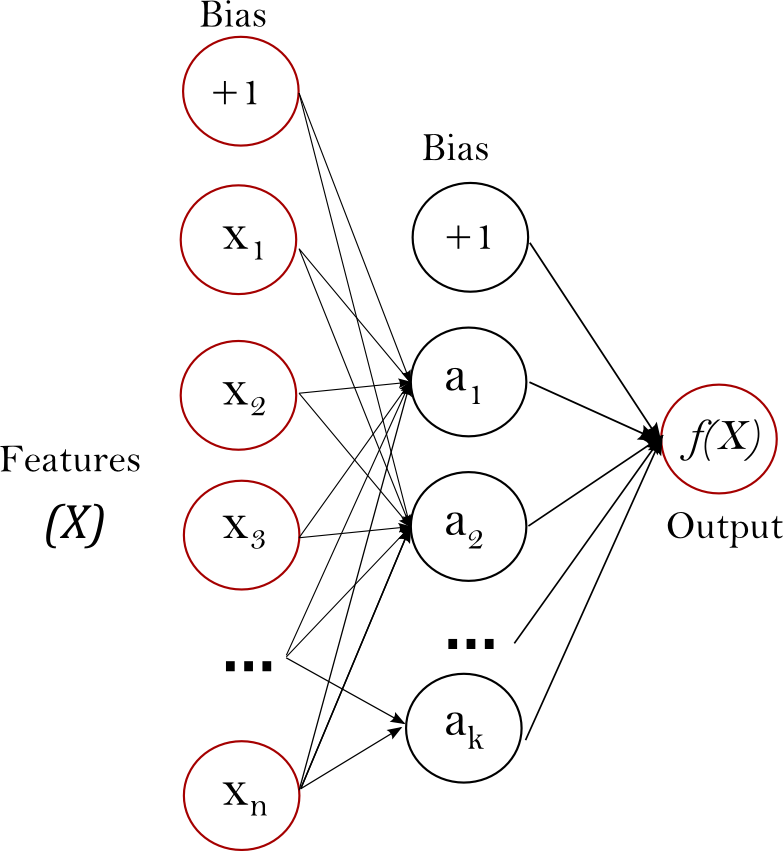
</div>

In [10]:


import tensorflow.compat.v1 as tf
print(tf.__version__)
tf.compat.v1.disable_eager_execution()



2.4.1


===========Data Summary===========
Training Data : (398, 12)
Testing Data : (171, 12)

============Processing============
Step:     0	Loss: 1.208	Acc: 37.44%
Step:  1000	Loss: 0.606	Acc: 62.56%
Step:  2000	Loss: 0.573	Acc: 62.56%
Step:  3000	Loss: 0.540	Acc: 62.56%
Step:  4000	Loss: 0.505	Acc: 63.57%
Step:  5000	Loss: 0.469	Acc: 66.83%
Step:  6000	Loss: 0.436	Acc: 71.11%
Step:  7000	Loss: 0.405	Acc: 77.39%
Step:  8000	Loss: 0.377	Acc: 80.90%
Step:  9000	Loss: 0.353	Acc: 83.17%
Step: 10000	Loss: 0.332	Acc: 84.92%
Step: 11000	Loss: 0.313	Acc: 86.68%
Step: 12000	Loss: 0.298	Acc: 87.69%
Step: 13000	Loss: 0.284	Acc: 88.69%
Step: 14000	Loss: 0.272	Acc: 89.70%
Step: 15000	Loss: 0.262	Acc: 89.70%
Step: 16000	Loss: 0.253	Acc: 90.45%
Step: 17000	Loss: 0.245	Acc: 90.45%
Step: 18000	Loss: 0.238	Acc: 90.70%
Step: 19000	Loss: 0.232	Acc: 90.45%
Step: 20000	Loss: 0.227	Acc: 90.70%

============Results============
Model Prediction = 0.9070352
Test Prediction = 0.94736844


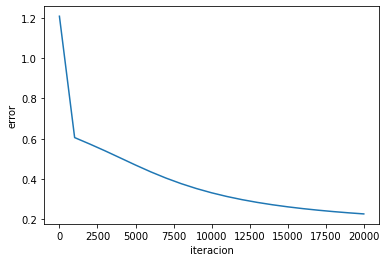

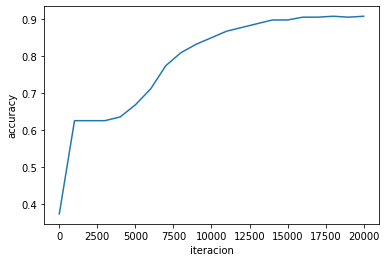

In [13]:
from matplotlib import pyplot as plt  # comando para graficar con matplotlib


print("===========Data Summary===========")
print("Training Data :", x_tr.shape)
print("Testing Data :", x_ts.shape)

num_features = 12
num_hidden1 = 12
num_output = 1

X = tf.placeholder(tf.float32, [None,num_features])
Y = tf.placeholder(tf.float32, [None, num_output])

# pesos y biases de la capa de entrada (datos de entrnamiento) a capa oculta
W1 = tf.Variable(tf.random_normal([num_features,num_hidden1], seed=0), name='weight1')
b1 = tf.Variable(tf.random_normal([num_hidden1], seed=0), name='bias1')
layer1 = tf.nn.sigmoid(tf.matmul(X,W1) + b1)

# pesos y biases de la capa oculta a capa de salida
W2 = tf.Variable(tf.random_normal([num_hidden1,num_output], seed=0), name='weight2')
b2 = tf.Variable(tf.random_normal([num_output], seed=0), name='bias2')


logits = tf.matmul(layer1,W2) + b2

# valor de salida de la red neuronal
# Cambiamos el valor de la función sigmoide a tanh
hypothesis = tf.nn.tanh(logits)
  
# funcion de error 
# x = logits, z = labels     
# sigmoid_cross_entropy = x - x * z + log(1 + exp(-x))
cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
cost = tf.reduce_mean(cost_i)

# entrenamiento por descenso de gradientes, factor de aprendizaje 0.01
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# definicion de accuracy, fraccion de aciertos de la red neuronal en una iteracion sobre los datos de entrenamiento
prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
correct_prediction = tf.equal(prediction, Y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))


print("\n============Processing============")
    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

#    cost_summary = tf.summary.scalar("error",cost)
#    acc_summary = tf.summary.scalar("acc",accuracy)
    # Merge all summaries
#    all_summary = tf.summary.merge_all()
#    writer = tf.summary.FileWriter("C:/Users/Alfredo/Documents/GitHub/RNP/tensorboard/mlp_breastc_tf", sess.graph)

    
    loss_value = []
    acc_value = []
    itera = []
    for step in range(20001):
        sess.run(train, feed_dict={X: x_tr, Y: y_tr})
        if step % 1000 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: x_tr, Y: y_tr})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
#            summary_results = sess.run(all_summary,feed_dict={X: x_tr, Y: y_tr})
#            writer.add_summary(summary_results,step)  

            loss_value = np.append(loss_value,loss)
            acc_value = np.append(acc_value,acc)
            itera = np.append(itera,step)
            
    train_acc = sess.run(accuracy, feed_dict={X: x_tr, Y: y_tr})
    test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: x_ts, Y: y_ts})
  

    

    print("\n============Results============")
    print("Model Prediction =", train_acc)
    print("Test Prediction =", test_acc)
    
    plt.plot(itera,loss_value)
    plt.ylabel('error')
    plt.xlabel('iteracion')
    plt.show()
    
    plt.plot(itera,acc_value)
    plt.ylabel('accuracy')
    plt.xlabel('iteracion')
    plt.show()